### 51. データの入手・整形
News Aggregator Data Setをダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

1. ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
2. 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
3. 抽出された事例をランダムに並び替える．
4. 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．

学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('./newsCorpora.csv', sep='\t', header=None, names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])
print(df)


            ID                                              TITLE  \
0            1  Fed official says weak data caused by weather,...   
1            2  Fed's Charles Plosser sees high bar for change...   
2            3  US open: Stocks fall after Fed official hints ...   
3            4  Fed risks falling 'behind the curve', Charles ...   
4            5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   
...        ...                                                ...   
422414  422933  Surgeons to remove 4-year-old's rib to rebuild...   
422415  422934  Boy to have surgery on esophagus after battery...   
422416  422935  Child who swallowed battery to have reconstruc...   
422417  422936  Phoenix boy undergoes surgery to repair throat...   
422418  422937  Phoenix boy undergoes surgery to repair throat...   

                                                      URL          PUBLISHER  \
0       http://www.latimes.com/business/money/la-fi-mo...  Los Angeles Times   
1       htt

In [4]:
df_1 = df[(df["PUBLISHER"]=="Reuters")|(df["PUBLISHER"]=="Huffington Post")|(df["PUBLISHER"]=="Businessweek")|
            (df["PUBLISHER"]=="Contactmusic.com")|(df["PUBLISHER"]=="Daily Mail")].loc[:, ["CATEGORY", "TITLE"]]
print(df_1)
print(df_1[13339:13340])


       CATEGORY                                              TITLE
12            b       Europe reaches crunch point on banking union
13            b  ECB FOCUS-Stronger euro drowns out ECB's messa...
19            b  Euro Anxieties Wane as Bunds Top Treasuries, S...
20            b  Noyer Says Strong Euro Creates Unwarranted Eco...
29            b  REFILE-Bad loan triggers key feature in ECB ba...
...         ...                                                ...
422300        m     UN: Ebola Could Eventually Infect 20000 People
422301        m  Ebola toll tops 1550, continues to accelerate ...
422302        m  UPDATE 1-Ebola toll tops 1550, outbreak accele...
422309        m  Ebola Cases May Surpass 20000, WHO Says in Upd...
422319        m  Air France suspends flights to Ebola-hit Sierr...

[13340 rows x 2 columns]
       CATEGORY                                              TITLE
422319        m  Air France suspends flights to Ebola-hit Sierr...


In [5]:
df_2 = df_1.sample(frac=1, ignore_index=True)
print(df_2)

      CATEGORY                                              TITLE
0            t  Only 1 in 5 Americans believe in the Big Bang ...
1            e  Aereo Arguments at Supreme Court Put Cloud Tec...
2            e  Harrison Ford - Harrison Ford to miss eight we...
3            e  'Once Upon A Time' Casts Anna And Kristoff Fro...
4            e  Josh Radnor - How I Met Your Mother Kids Knew ...
...        ...                                                ...
13335        t  The shirt that can monitor your stress levels ...
13336        t    Hacker Weev's Chilling Conviction Is Overturned
13337        e  Chris Evans Will Walk Away From Acting After M...
13338        e  L'wren Scott's Sister Slams Mick Jagger's Rece...
13339        e  Kristen Bell Talks Relationship To Character V...

[13340 rows x 2 columns]


In [6]:
df_Train, df_Test = train_test_split(df_2, test_size=0.2)
df_Test, df_Val = train_test_split(df_Test, test_size=0.5)

df_Train.to_csv('./train.txt', sep='\t', index=False)
df_Test.to_csv('./test.txt', sep='\t', index=False)
df_Val.to_csv('./valid.txt', sep='\t', index=False)


### 51. 特微量抽出

学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

In [2]:
import collections
import re
import numpy as np
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

In [8]:

def Process(lines):
    sign_regrex = re.compile('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`|＄＃＠£â€™é\n]')
    lines = sign_regrex.sub("", lines)
    lines = re.sub("(\d+)", r" \1 ", lines)
    texts = lines.split(" ")
    texts = list(filter(lambda x:x, texts))#空リスト削除
    word_list = list(map(lambda x:x.lower(), texts))#小文字にする
    return word_list


In [9]:
def cleaningText(text):
    sign_regrex = re.compile('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`|＄＃＠£â€™é\n]')
    text = sign_regrex.sub("", text)
    text = re.sub("(\d+)", r" \1 ", text)
    text = text.lower()
    return text
    

In [10]:
def makeWordList():
    f = pd.read_csv(('./train.txt'), sep='\t')
    word_list = []
    for line in f['TITLE']:
        word_list.extend(Process(line))
    c = collections.Counter(word_list).most_common()
    return [i[0] for i in c]


In [11]:
def makeDocs(lines):
    # df_Train = pd.read_csv('./train.txt', sep='\t')
    docs = []
    # for i in range(len(df_Train)):
    for s in lines:
        # docs.append(cleaningText(df_Train['TITLE'][i]))
        docs.append(cleaningText(s))
    return docs


In [12]:
def createFeatureFile(name):
    df = pd.read_csv('./{}.txt'.format(name), sep='\t')
    docs = makeDocs(df['TITLE'])
    vectorizer = TfidfVectorizer(smooth_idf=False, vocabulary=GlobalWordList)
    X = vectorizer.fit_transform(docs)

    values = X.toarray()
    result = pd.DataFrame(values, columns=GlobalWordList)
    result = normalize(result, norm='l2')
    result = pd.DataFrame(result, columns=GlobalWordList)
    df_feature = pd.concat([df['CATEGORY'], df['TITLE'], result], axis=1)
    df_feature.to_csv(f'./{name}.feature.txt', sep='\t')
    return df_feature


In [13]:
GlobalWordList = makeWordList() #辞書をグローバル変数で定義


In [ ]:
createFeatureFile('train')
createFeatureFile('test')
createFeatureFile('valid')

### 52. 学習

51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [3]:
from sklearn.linear_model import LogisticRegression
import pickle


In [4]:
def Encoder(sign):
    if sign == "e":
        code = 0
    elif sign == "b":
        code = 1
    elif sign == "m":
        code = 2
    elif sign == "t":
        code = 3
    else:
        pass
    return code

In [5]:
df_tr = pd.read_csv("./train.feature.txt", index_col = 0, sep='\t')


In [6]:
df_tr["CATEGORY"] = df_tr["CATEGORY"].map(Encoder)
print(df_tr['CATEGORY'])

0        1
1        2
2        1
3        2
4        0
        ..
10667    1
10668    1
10669    0
10670    1
10671    1
Name: CATEGORY, Length: 10672, dtype: int64


In [7]:
# print(df_tr['CATEGORY'])
X = df_tr.iloc[:,2:].values.tolist()


: 

In [8]:
Y_ = df_tr["CATEGORY"].values.tolist()

In [9]:
lr = LogisticRegression()
lr.fit(X, Y_)


LogisticRegression()

In [ ]:
pickle.dump(lr, open("[PATH]/Logistic_model.sav", 'wb'))


### 53. 予測
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [2]:
import pandas as pd
import pickle

In [1]:
def Decoder(code):
    if code == 0:
        sign = "e"
    elif code == 1:
        sign = "b"
    elif code == 2:
        sign = "m"
    elif code == 3:
        sign = "t"
    else:
        pass
    return sign

In [12]:
df = pd.read_csv('./test.feature.txt', sep='\t', index_col=0)
df_y = df["CATEGORY"].map(Encoder)

### 55. 混同行列の作成
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [4]:
def Encoder(sign):
    if sign == "e":
        code = 0
    elif sign == "b":
        code = 1
    elif sign == "m":
        code = 2
    elif sign == "t":
        code = 3
    else:
        pass
    return code

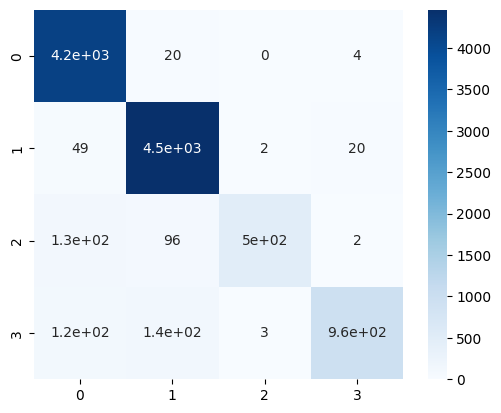

In [19]:
def createCM(name):
    labels = [0, 1, 2, 3]
    df = pd.read_csv(f'./{name}.feature.txt', sep='\t', index_col = 0)
    df_y = df['CATEGORY'].map(Encoder)
    Y_ = df_y.values.tolist()
    Y_pred_ = pickle.load(open(f'./Y_pred_{name}.sav', 'rb'))
    # print(Y_train)
    # print(Y_pred_train)

    cm = confusion_matrix(Y_, Y_pred_, labels=labels)
    df_cm = pd.DataFrame(data=cm, index=['e', 'b', 'm', 't'], columns=['e', 'b', 'm', 't'])
    sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues')
    plt.show()